In [56]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(sns.__version__)

0.13.2


In [57]:
df = sns.load_dataset("iris")

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


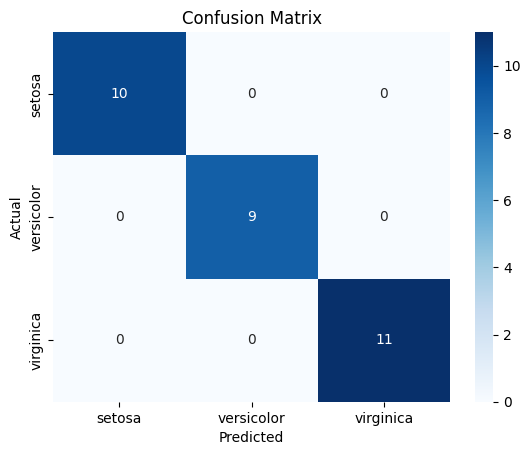

In [69]:
# confusion matrix and classification report with seaborn
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['species'].unique(), yticklabels=df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



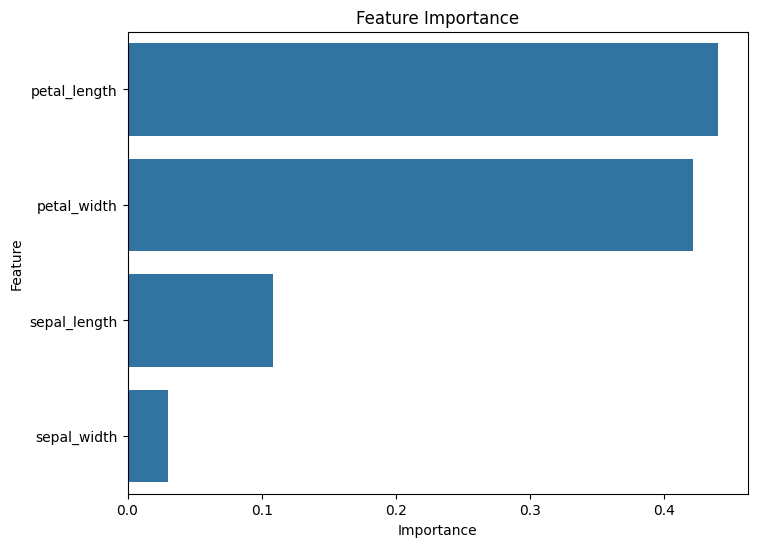

In [60]:
# calculate feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [61]:
# Our target variable will be 'species', and the features will be the other columns
X = df.drop(columns=['species'])
y = df['species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 1.00


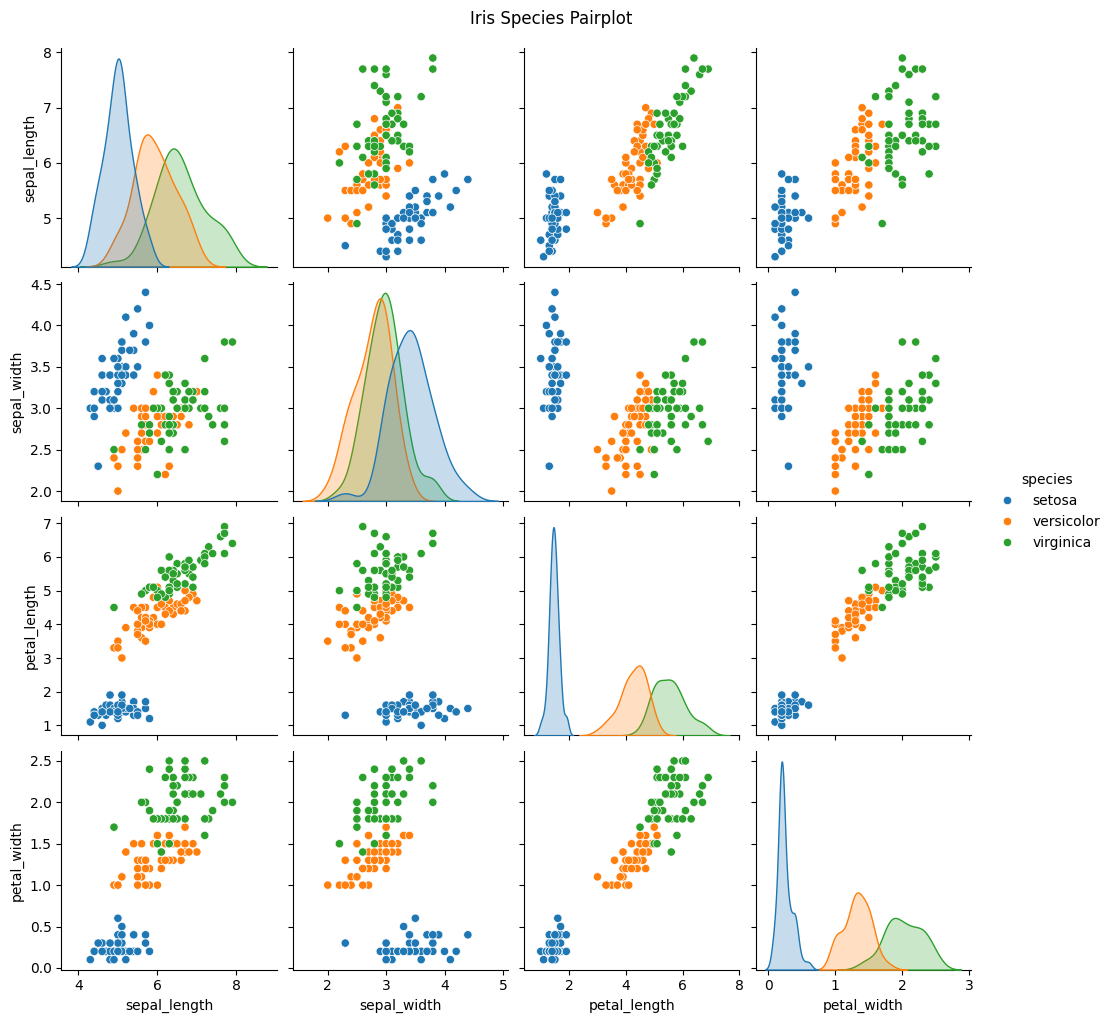

In [62]:
# plot the different species
sns.pairplot(df, hue='species')
plt.suptitle('Iris Species Pairplot', y=1.02)
plt.show()


New chapter, new model (KMeans Clustering)!
===

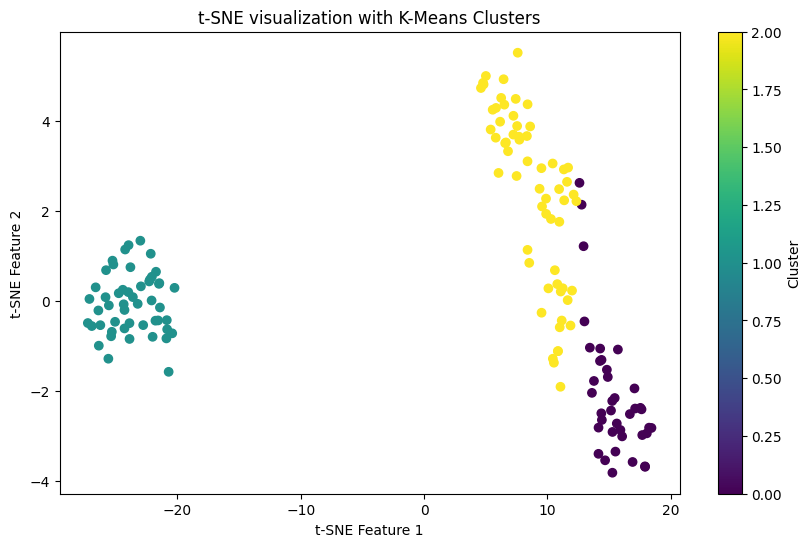

In [65]:
# Tsne and k-means clustering for visualization
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1] ,c=clusters, cmap='viridis')
plt.title("t-SNE visualization with K-Means Clusters")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar(label='Cluster')
plt.show()